In [ ]:
!pip install transformers

In [ ]:
!pip install sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW

In [ ]:
df=pd.read_csv("Totalcombined-5.csv")

In [ ]:
df.head()

,text,unknowns,equations,Unnamed: 3
0,one number is 11 more than another number. Fin...,"x, y","x=y+11, 3*x=4*y+4",NaN
1,One number is 3 less than a second number. Twi...,"x, y","x + 3 = y, 2*y + 12 = 5*x",NaN
2,Find two numbers whose sum is 62 and whose dif...,"x, y","x+y=62, x-y=6",NaN
3,the sum of two numbers is 68. their difference...,"x, y","x+y=68, x-y=16",NaN
4,the sum of two numbers is 97. the difference o...,"x, y","x+y=97, x-y=57",NaN


In [ ]:
df.count()

text          4356
unknowns      2873
equations     4356
Unnamed: 3    1483
dtype: int64

In [ ]:
df.isnull()

,text,unknowns,equations,Unnamed: 3
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
4351,False,False,False,True
4352,False,False,False,True
4353,False,False,False,True
4354,False,False,False,True


In [ ]:
df['text']="Math problem SOlution " + df['text']

In [ ]:
input=list(df['text'])

In [ ]:
output=list(df['equations'])

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input,output,test_size=0.2,random_state=1)

In [ ]:
X_train

['Math problem SOlution If (a+b)/a=6 and (b+c)/c=9 then what is the numerical value of a/c?',
 'Math problem SOlution the sum of four times a number and three is the same as the difference of twice the number and eleven. Find the number.',
 'Math problem SOlution Find three consecutive even integers whose sum is 192.',
 'Math problem SOlution Find four consecutive integers whose sum is 94.',
 'Math problem SOlution find three consecutive integers whose sum is -33',
 'Math problem SOlution Three times the sum of a number and five gives a result of 21. Find the number?',
 'Math problem SOlution find four consecutive integers whose sum is 62',
 'Math problem SOlution Find two integers such that their sum is -1 and the sum of their squares is 61.',
 'Math problem SOlution One integer is four times another. The sum of the integers is 65. What is the value of the lesser integer?',
 'Math problem SOlution The numerator of a fraction is 7 less than the denominator, and if 4 is subtracted from 

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("t5-base",model_max_length=256)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
input_ids = tokenizer("The sum of three consecutive numbers is 600. What is the least of these three numbers?", return_tensors="pt").input_ids
print(input_ids)

tensor([[   37,  4505,    13,   386, 12096,  2302,    19,  7366,     5,   363,
            19,     8,   709,    13,   175,   386,  2302,    58,     1]])


In [ ]:

model = T5ForConditionalGeneration.from_pretrained("t5-base")

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# Perform input encoding
encoded_input = tokenizer(X_train, padding=True, truncation=True, return_tensors='pt')

encoded_output = tokenizer(Y_train, padding=True, truncation=True, return_tensors='pt')




print(encoded_input)


{'input_ids': tensor([[9762,  682, 5055,  ...,    0,    0,    0],
        [9762,  682, 5055,  ...,    0,    0,    0],
        [9762,  682, 5055,  ...,    0,    0,    0],
        ...,
        [9762,  682, 5055,  ...,    0,    0,    0],
        [9762,  682, 5055,  ...,    0,    0,    0],
        [9762,  682, 5055,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [ ]:
len(encoded_input)

2

In [ ]:
input_ids, attention_mask = encoded_input.input_ids, encoded_input.attention_mask

In [ ]:
input_ids_shape = encoded_input["input_ids"].size()
print(input_ids_shape)

torch.Size([3484, 107])


In [ ]:
labels = encoded_output.input_ids

In [ ]:
labels

tensor([[  41,  115, 1220,  ...,    0,    0,    0],
        [ 314, 1935,  226,  ...,    0,    0,    0],
        [4743, 1935,  157,  ...,    0,    0,    0],
        ...,
        [   3,  226, 1220,  ...,    0,    0,    0],
        [   3,  226, 1220,  ...,    0,    0,    0],
        [   3,   63, 2423,  ...,    0,    0,    0]])

In [ ]:
labels[labels == tokenizer.pad_token_id] = -100

In [ ]:
labels

tensor([[  41,  115, 1220,  ..., -100, -100, -100],
        [ 314, 1935,  226,  ..., -100, -100, -100],
        [4743, 1935,  157,  ..., -100, -100, -100],
        ...,
        [   3,  226, 1220,  ..., -100, -100, -100],
        [   3,  226, 1220,  ..., -100, -100, -100],
        [   3,   63, 2423,  ..., -100, -100, -100]])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)
labels = labels.to(device)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader


dataset = TensorDataset(input_ids, attention_mask, labels)


dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
epochs = 2
batch_size = 16
learning_rate = 1e-4

optimizer =torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
from transformers import set_seed

# Set the seed for Transformers library
set_seed(42)


In [ ]:
torch.manual_seed(42)

In [ ]:

model.train()
loss_values = []
epochs_list = []

for epoch in range(5):
    total_loss = 0


    for batch in dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()


        output = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = output.loss


        loss.backward()
        optimizer.step()


        total_loss += loss.item()


    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{epochs} - Average Loss: {avg_loss:.4f}")
    loss_values.append(avg_loss)
    epochs_list.append(epoch + 1)

Epoch 1/2 - Average Loss: 1.2988
Epoch 2/2 - Average Loss: 0.7503
Epoch 3/2 - Average Loss: 0.5838
Epoch 4/2 - Average Loss: 0.4854
Epoch 5/2 - Average Loss: 0.4026


In [ ]:
model.save_pretrained('downloads/model')

In [ ]:
tokenizer.save_pretrained('downloads/tokenizer')

('downloads/tokenizer/tokenizer_config.json',
 'downloads/tokenizer/special_tokens_map.json',
 'downloads/tokenizer/spiece.model',
 'downloads/tokenizer/added_tokens.json',
 'downloads/tokenizer/tokenizer.json')

In [ ]:
torch.save(model.state_dict(), 'model')

# Step 2: Free up the GPU
# At this point, you can release the GPU resources for other tasks
model.to('cpu')  # Move the model to the CPU
del model  # Delete the model to free GPU memory


In [ ]:
torch.cuda.empty_cache()

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Assuming 't5-base' is the same model you initially loaded
loaded_model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

loaded_model.load_state_dict(torch.load('model', map_location='cpu'))  # Load the model on CPU

# Move the loaded model to the appropriate device (CPU or GPU) if needed
loaded_model = loaded_model.to(device)

# Set the model to evaluation mode
loaded_model.eval()


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:238: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

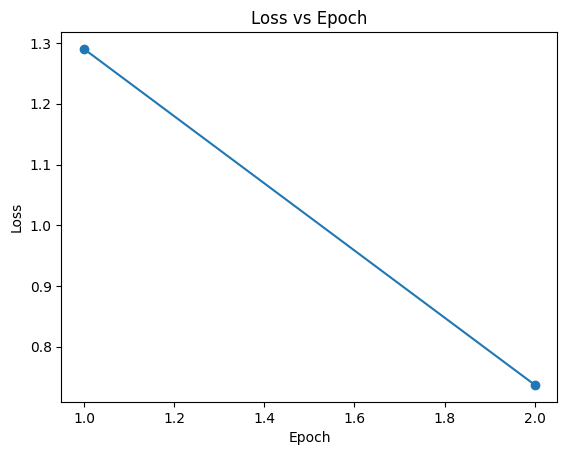

In [ ]:
# Plot the loss values against the epochs
import matplotlib.pyplot as plt
plt.plot(epochs_list, loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(False)
plt.show()

In [ ]:
# Set the seed for Transformers library
set_seed(42)

In [ ]:
torch.manual_seed(42)

In [ ]:
model.eval()

# Disable Batch Normalization and Dropout layers
# Note: You should only do this if you want to disable these layers for evaluation.
# In most cases, BatchNorm and Dropout should be enabled during training.


In [ ]:
def accuracy(y_true, y_pred):
    """
    Calculate accuracy given true labels and predicted labels.

    Args:
        y_true (list or array): List of true labels.
        y_pred (list or array): List of predicted labels.

    Returns:
        float: Accuracy score between 0 and 1.
    """
    correct = 0
    total = len(y_true)

    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1

    acc = correct / total
    return acc


In [ ]:

encoded_input1 = []

for test_question in X_test:
    # Tokenize the test question
    inputs = tokenizer(test_question, padding=True, truncation=True, return_tensors="pt").to(device)

    # Generate an equation using the model
    generated_equation = loaded_model.generate(inputs)

    # Decode the generated equation
    decoded_equation = tokenizer.decode(generated_equation[0], skip_special_tokens=True)

    # Print and store the decoded equation
    print(decoded_equation)
    encoded_input1.append(decoded_equation)

# input_ids1, attention_mask1 = encoded_input1.input_ids.to(device), encoded_input1.attention_mask

#  output=model.generate(i)
#  print(output)
# y_pred=output[0]
# labels1 = encoded_output1.input_ids
# labels1[labels1==tokenizer.pad_token_id]=-100
# y_true=labels
# print(y_true)
# accuracy(y_pred,y_true)

AttributeError: ignored

In [ ]:

input_ids = tokenizer(
    "English to Math Equation:During the period of 51, the greening department planned to plant 6,600 trees of species A and B next to the main road in the county. If the number of flowers and trees in A is twice the number of flowers and trees in B, 600 trees are less. Find the number of flowers and trees in species A and B ? If there are x and y trees in A and B respectively, find the values of x and y.",
    return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids,num_beams=4)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:If you have five consecutive integers such that the even integers add up to 48 what is the smallest odd integer?",
    return_tensors="pt"
).input_ids.to(device)

outputs = model.generate(input_ids)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:A number is 72 less than its square. Find all such numbers.", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:Three times the first of three consecutive odd integers is 3 more than twice the third. Find the third integer ?", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:The sum of three consecutive odd numbers is 153. Which is the LARGEST number?", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:if 1/3 is added to the reciprocal of a number , the result is 3 more than 3 times the reciprocal of the original number. find the number", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:how many permutations of digits in the number 12345 will make an even number?", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:if 1/4 is added to the reciprocal of a number , the result is 5 more than 2 times the reciprocal of the original number. find the number",
    return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:60 is 170% of what number?", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:The sum of three consecutive even integers is fourteen less than twice the smallest of these integers. Calculate the product of the integers.", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:3 less than 5 times a number is 11 more than the number? Find the number.", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
input_ids = tokenizer(
    "English to Math Equation:Five times a larger number added to 4 times a smaller number totals 34. When twice the smaller number is subtracted from twice the larger number, the result is 2. What are the two numbers?", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


5*x+4*y=34, 2*x-2*y=2*


In [ ]:
input_ids = tokenizer(
    "Math problem SOlution Solve for z : 12 + z = -29", return_tensors="pt"
).input_ids.to(device)
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))